# Self Organizing Map

**1. Data Preprocessing**

In [1]:
pip install MiniSom

  Stored in directory: C:\Users\Lenovo\AppData\Local\pip\Cache\wheels\b8\c6\01\330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# we want to identify the frauds
dataframe = pd.read_csv('Credit_Card_Applications.csv')
dataframe.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataframe.iloc[:, :-1].values
# SOM is an unsupervised deep learning, so we don't need 'y'
y = dataframe.iloc[:, -1].values

**Feature Scaling**

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler(feature_range=(0, 1))

In [6]:
X = sc.fit_transform(X)

**2. Training the SOM**

In [7]:
from minisom import MiniSom

In [8]:
# input_len: 14 attribute + 1 client_id
# sigma: radius of different neighborhood in grid
# learning_rate: how much weights will be updated
# decay_function: use to improve convergence
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [9]:
som.random_weights_init(X)

Mean Interneuron Distance (MID): The mean of the distances of all the neurons
around the winning node inside the neighborhood we define with 'sigma'.<br>
**The more MID is higher, winning node will be farther -> outlier -> frauds**

In [10]:
som.train_random(data = X, num_iteration = 100)

**3. Visualizing**<br>
large MID is close more to white -> more fraud

In [11]:
from pylab import bone, pcolor, colorbar, plot, show

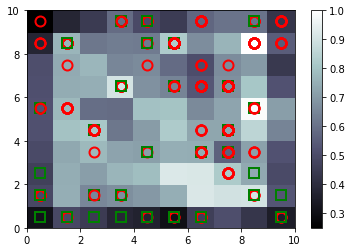

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()
# red: didn't get approval, green: get approval
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # set marker in the middle of the squares     
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

**4. Finding the frauds**

In [13]:
mappings = som.win_map(X)

In [14]:
frauds = np.concatenate((mappings[(8, 8)], mappings[(8, 5)]), axis = 0)
# rescale
frauds = sc.inverse_transform(frauds)

In [20]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15767264.0,1.0,74.83,19.000,1.0,1.0,1.0,0.040,0.0,1.0,2.0,0.0,2.0,0.0,352.0
1,15704581.0,1.0,23.75,0.415,1.0,8.0,4.0,0.040,0.0,1.0,2.0,0.0,2.0,128.0,7.0
2,15761854.0,1.0,31.25,2.835,2.0,1.0,1.0,0.000,0.0,1.0,5.0,0.0,2.0,176.0,147.0
3,15725776.0,1.0,23.08,0.000,2.0,4.0,4.0,1.000,0.0,1.0,11.0,0.0,1.0,0.0,1.0
4,15815040.0,1.0,19.00,0.000,1.0,1.0,1.0,0.000,0.0,1.0,4.0,0.0,2.0,45.0,2.0
5,15788442.0,1.0,19.58,0.585,2.0,1.0,1.0,0.000,0.0,1.0,3.0,0.0,2.0,350.0,770.0
6,15737998.0,1.0,18.83,0.415,1.0,8.0,4.0,0.165,0.0,1.0,1.0,0.0,2.0,200.0,2.0
7,15718921.0,1.0,16.33,2.750,2.0,6.0,4.0,0.665,0.0,1.0,1.0,0.0,2.0,80.0,22.0
8,15633944.0,1.0,31.25,1.125,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,96.0,20.0
9,15607988.0,1.0,38.42,0.705,2.0,8.0,4.0,0.375,0.0,1.0,2.0,0.0,2.0,225.0,501.0


In [24]:
print('Fraud Customer IDs:')
fraud_id = frauds[:, 0]
for i in fraud_id:
  print(int(i))

Fraud Customer IDs:
15767264
15704581
15761854
15725776
15815040
15788442
15737998
15718921
15633944
15607988
15801072
15797767
15744044
15804235
15573798
15647295
15791944
15808662
15666166
15665087
15792107
15813192


# Hybrid Deep learning model

**1. Create Matrix of Features**

In [65]:
customers = dataframe.iloc[:, 1:].values

**2. Dependent Variable**

In [66]:
is_fraud = np.zeros(len(dataframe))

In [67]:
for i in range(len(dataframe)):
    if dataframe.iloc[i, 0] in fraud_id:
        is_fraud[i] = 1

**3. ANN**

**3.1. Feature Scaling**

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [70]:
customers = sc.fit_transform(customers)

**3.2. Building the ANN**

In [71]:
from keras.models import Sequential
from keras.layers import Dense

In [72]:
ann = Sequential()
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [73]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.4928
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.9304
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.9667
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9681
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2056 - accuracy: 0.9681
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1806 - accuracy: 0.9681
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9681
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1471 - accuracy: 0.9681
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1339 - accuracy: 0.9681
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9681

**3.3. Prediction**

In [75]:
y_pred = ann.predict(customers)

In [76]:
y_pred = np.concatenate((dataframe.iloc[:, 0:1].values, y_pred), axis = 1)

In [77]:
# sort from the lowest probability to highest probability
y_pred = y_pred[y_pred[:, 1].argsort()]

In [78]:
pd.DataFrame(y_pred)

,0,1
0,15776156.0,0.052354
1,15754578.0,0.052354
2,15644878.0,0.052354
3,15750055.0,0.052354
4,15664720.0,0.052354
5,15790630.0,0.052354
6,15625501.0,0.052354
7,15692430.0,0.052354
8,15746258.0,0.052354
9,15765487.0,0.052354
